In [1]:
import pandas as pd
import time, os, shutil
import re
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np  
from sklearn.cluster import KMeans  
from sklearn.cluster import DBSCAN
from nltk.parse import CoreNLPParser
from sklearn import decomposition as dc

#pos_tagger = CoreNLPParser(url='http://localhost:9000', tagtype='pos')

W0519 20:42:08.825644  1528 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
data_source = 'output/sub-set/'
file_name = 'Fire HD'+'.csv'
df = pd.read_csv(data_source+file_name, sep="\t", error_bad_lines=False)
reviews = pd.DataFrame(df['text'])

In [ ]:
reviews['POS'] = reviews.text.apply(lambda x: pos_tagger.tag(x.split()))

In [ ]:
reviews.to_csv(r'/mnt/doc/School/USYD/Capstone/workspace/data_testing/output/sub-set/fireHD-tag.csv',sep='\t')

In [ ]:
reviews['POS'][0:10].tolist()

In [ ]:
def getMainWords(pos):
    result = '';
    for x in pos:
        if x[1][0:2] in ['NN','VB']:
            result= result+x[0]+' '
    if len(result)>0:
        result= result[0:len(result)-1]
    return result

reviews['main'] = list(map(getMainWords,reviews['POS']))
reviews = reviews.loc[reviews['main'].apply(len)>0,['text','main']] #filtering out sentences without any nouns or verbs

reviews = reviews.reset_index(drop=True)# reset index

In [ ]:
#############################LOAD##################
# If load data with 'text' and 'main'
data_source = 'output/sub-set/'
file_name = 'fireHD-tag'+'.csv'
reviews = pd.read_csv(data_source+file_name, sep="\t", error_bad_lines=False).loc[:,['text','main']]
###################################################

In [ ]:
# Load google Universal Sentence Encoder
module_dir ="downloads/encoder-DNA" #"downloads/encoder"
embed = hub.Module(module_dir)

In [ ]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    start_time=time.time()
    reviews['sentence_embedding'] = pd.Series(list(session.run(embed(list(reviews['text'])))))
    end_time1=time.time()
    reviews['words_embedding'] = pd.Series(list(session.run(embed(list(reviews['main'])))))
    end_time2=time.time()
    print('time1:',(end_time1-start_time),' time2:',(end_time2-end_time1))

In [ ]:
words = ['library','librari']
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    re1 = session.run(embed(words))
    
np.inner(re1[0],re1[1])

In [ ]:
reviews

In [3]:
import re

def remove_banned(s,words):
    #words = sorted(words, key=len, reverse=True)
    pattern = '|'.join(words)
    s = re.sub(pattern, '', s, flags = re.I) # remove words
    s = re.sub(r'[0-9]+', '', s) # remove numbers
    s = re.sub('\s+', ' ', s, flags = re.I) # remove extra blank space'
    return s

bannedWords = ['hi', 'hi you', 'hello', 'and you']
s = "Hi, Hello, hi you, How are Tim and you doing"

print(remove_banned(s,bannedWords))

, , you, How are Tim doing


In [ ]:
#dict_dir = 'sentiment/'
#file_list=['intensity','NC','NE','opinion','PC','PE']
#file_dir =[dict_dir+x+'.txt' for x in file_list]
#file_dir

In [75]:
word_list = pd.read_csv('sentiment/wordlist.csv')
word_list = word_list.dropna()
word_list['count'] = word_list['word'].apply(lambda x: len(x.split()))
wd2 = word_list

In [76]:
word_list = word_list.sort_values(by=['count'],ascending =False).reset_index(drop=True)
word_list['word'] = word_list['word'].apply(lambda x: x+' ')

In [77]:
wordlist = word_list.loc[word_list['count']<10, ['word']]
wordlist = wordlist['word'].tolist()
wordlist

['refuse to give up until all hope is gone ',
 "feel as if a knife were piercing one's heart ",
 'forget the thing or conditions which bring one success ',
 'unable to act impartially for fear of offending sb ',
 'enjoy high position and live in ease and comfort ',
 'enjoy sth. bitter as if it were malt sugar ',
 'the course of true love never did run smooth ',
 'wind has subsided and the waves have calmed down ',
 'think and act in one and the same way ',
 'unable to act impartially for fear of offending sb. ',
 'turn pale at the mere mention of something terrible ',
 'switch to a job one was not trained for ',
 'give a blow and a shout a severe rebuke ',
 "fleeing army's suspicion of danger at the slightest sound ",
 'can find no place to hide oneself for shame ',
 'fall of a single leaf ushers in the autumn ',
 'stake a thousand pieces of gold on one throw ',
 'secure in the knowledge that one has strong backing ',
 'doing work for others with no benefit to oneself ',
 'well versed 

In [82]:
one_word = wd2[wd2['count']==1]['word'].tolist()
one_word = set(one_word)
one_word

{'amply',
 'insolent',
 'open-ended',
 'inert',
 'manly',
 'autocratically',
 'illiterate',
 'futile',
 'mannerly',
 'careworn',
 'extrovert',
 'disabled',
 'slant',
 'matter',
 'bogus',
 'superheated',
 'conspicuous',
 'promptly',
 'harehearted',
 'torpidness',
 'genteelly',
 'exhaustive',
 'grumpy',
 'guilty',
 'mechanically',
 'accept',
 'irritated',
 'blame',
 'irresoluteness',
 'rotten',
 'ho-hum',
 'objectionableness',
 'curvaceousness',
 'playful',
 'spotless',
 'fulgurant',
 'wrongly',
 'desperately',
 'disorderly',
 'vain',
 'agree',
 'unrighteous',
 'luxe',
 'fraudulent',
 'lawlessly',
 'unscrupulous',
 'unauthentic',
 'loyal',
 'thoughtlessness',
 'equitably',
 'ominously',
 'ignobly',
 'undisclosed',
 'stormy',
 'carry',
 'happy',
 'grievous',
 'conscienceless',
 'sham',
 'unreliableness',
 'intimate',
 'equal',
 'abnormal',
 'high-tensile',
 'sexy',
 'extramarital',
 'worrisome',
 'redundant',
 'epic',
 'old',
 'pithily',
 'all-round',
 'hot',
 'penury',
 'dogged',
 'horre

In [83]:
def clean_review(x):

    words = one_word
    #{'love','loves','loved','like','likes','liked','enjoy','enjoys','enjoyed',
            # 'hate','hates','hated','do','does','did','don','don\'t','want','wants','wanted'}

    resultwords  = [word for word in re.split("\W+",x) if word.lower() not in words]
    result = ' '.join(resultwords)
    return result

In [70]:
for i in range(len(wordlist)):
    if wordlist[i]=='love ':
        print('in')
        
print('finished')

in
finished


In [53]:
reviews['removed'] = reviews['text'].apply(lambda x: remove_banned(x,wordlist))

,text,removed
0,I find that is not as easy to use as my regula...,I that is not as to use as my Kindle Fire
1,When I am reading the kindle it freezes up (be...,When I am reading the kindle it freezes up (be...
2,Also you have to get out of it to brighten or ...,Alyou have to get out of it to brighten or dar...
3,"Lastly, the advertisements that come up every ...","Lastly, the advertisements that come up etime ..."
4,Convenient and use the library to download books,and use the library to download books
5,Should have done this a long time ago,Should have done this a time ago
6,The video is the best,The video is the best
7,I don't bother watching the news on the televi...,I don't watching the news on the television an...
8,Couldn't be happier with this,Couldn't be happier with this
9,Good reading device and easy to use,reading device and to use


In [85]:
reviews['removed'] = reviews['text'].apply(lambda x: clean_review(x))
reviews

,text,removed
0,I find that is not as easy to use as my regula...,I that is not as to use as my Kindle Fire
1,When I am reading the kindle it freezes up (be...,When I am reading the kindle it freezes up bec...
2,Also you have to get out of it to brighten or ...,Also you have to get out of it to brighten or ...
3,"Lastly, the advertisements that come up every ...",Lastly the advertisements that come up every t...
4,Convenient and use the library to download books,and use the library to download books
5,Should have done this a long time ago,Should have done this a time ago
6,The video is the best,The video is the
7,I don't bother watching the news on the televi...,I don t watching the news on the television an...
8,Couldn't be happier with this,Couldn t be happier with this
9,Good reading device and easy to use,reading device and to use


In [142]:
def clean_punct(line):
    line = re.sub('[&#;.,?!%]+', '',line)
    line = re.sub('([0-9])+','',line)
    line = re.sub(' +', ' ',line)
    return line.strip()

In [143]:
test_str = '34 34 aaa bbb, 100% good'
clean_punct(test_str)

'aaa bbb good'

In [144]:
reviews['removed'] = reviews['removed'].apply(lambda x: clean_punct(x))

In [145]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")
#reviews['stemmed'] = reviews.text.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
#reviews.stemmed.head()
#reviews['stemmed'] = reviews.stemmed.apply(lambda x: re.sub(' +', ' ',x).strip())

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from itertools import islice


In [147]:
cvec = CountVectorizer(stop_words='english', min_df=0.001, max_df=.2, ngram_range=(2,3))
cvec.fit(reviews.removed)
len(cvec.vocabulary_)
#list(islice(cvec.vocabulary_.items(), 20))

177

In [148]:
cvec_counts = cvec.transform(reviews.text)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
#counts_df.sort_values(by='occurrences', ascending=False).head(20)

sparse matrix shape: (3366, 177)
nonzero count: 959
sparsity: 0.16%


In [149]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df = weights_df.sort_values(by='weight', ascending=False).reset_index(drop=True)
weights_df.head()

,term,weight
0,battery life,0.010388
1,kindle hd,0.009043
2,wi fi,0.005054
3,customer service,0.004768
4,learning use,0.004624


In [150]:
key_words = weights_df[weights_df.weight>=0.0005]

In [151]:
len(key_words)

163

In [152]:
key_words

,term,weight
0,battery life,0.010388
1,kindle hd,0.009043
2,wi fi,0.005054
3,customer service,0.004768
4,learning use,0.004624
5,read books,0.004360
6,play games,0.003595
7,christmas gift,0.003429
8,generation kindle,0.003160
9,kindle years,0.002998


In [153]:
import pandas as pd
import time, os, shutil
import re
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np  
from sklearn.cluster import KMeans  
from sklearn.cluster import DBSCAN
from nltk.parse import CoreNLPParser
from sklearn import decomposition as dc

In [154]:
# Load google Universal Sentence Encoder
module_dir ="downloads/encoder-DNA" #"downloads/encoder"
embed = hub.Module(module_dir)


In [155]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    start_time=time.time()
    key_words['embedding'] = pd.Series(list(session.run(embed(list(key_words['term'])))))
    end_time1=time.time()
    print('time1:',(end_time1-start_time))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0519 22:33:43.457817  1528 saver.py:1483] Saver not created because there are no variables in the graph to restore
C:\Users\betty\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


time1: 4.200206518173218


In [156]:
key_words

,term,weight,embedding
0,battery life,0.010388,"[0.008102105, -0.017975343, -0.046883713, 0.05..."
1,kindle hd,0.009043,"[0.06953007, 0.059404656, -0.04663009, 0.05660..."
2,wi fi,0.005054,"[0.033367272, 0.053270333, -0.031291656, 0.054..."
3,customer service,0.004768,"[-0.059746552, 0.060829293, -0.028320795, 0.05..."
4,learning use,0.004624,"[0.03378463, 0.049826644, -0.05798367, 0.05230..."
5,read books,0.004360,"[0.005046563, -0.0015472032, -0.022233723, 0.0..."
6,play games,0.003595,"[-0.054311115, 0.042440556, -0.0069745737, 0.0..."
7,christmas gift,0.003429,"[-0.0032537342, 0.04958094, -0.05590751, 0.021..."
8,generation kindle,0.003160,"[0.059109703, 0.0603793, -0.051360145, 0.06394..."
9,kindle years,0.002998,"[0.061008908, 0.06907328, -0.04623535, 0.05938..."


In [157]:
terms = key_words['term'].tolist()
embs = key_words['embedding'].tolist()

In [158]:
corr = np.inner(embs,embs)

In [165]:
corr[7][26]

0.9641325

In [163]:
corr[corr<0]=0
corr[corr>0.99]=0

In [164]:
result = np.where(corr == np.amax(corr))
result[0]

array([ 7, 26], dtype=int64)

In [170]:
n_sentence = len(terms)
corr_maxes = np.amax(corr,axis=1)
corr_mins = np.amin(corr,axis=1)
avg_corr = sum(sum(corr))/n_sentence/n_sentence
avg_max_corr = sum(corr_maxes) / n_sentence
avg_min_corr = sum(corr_mins) / n_sentence
print('avg max corr:{}, avg min corr:{}. avg corr:{}'.format(avg_max_corr, avg_min_corr, avg_corr))

avg max corr:0.789339728150631, avg min corr:0.0. avg corr:0.32077466129175336


In [179]:
# Clustering
time1 = time.time()
db_w = DBSCAN(eps=0.25, metric='cosine').fit(embs)
print('time for clustering sentence embeddings:', (time.time()-time1))
# Get labels
labels_w = db_w.labels_.tolist()
key_words['label'] = labels_w
key_words

time for clustering sentence embeddings: 0.007995367050170898


C:\Users\betty\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,term,weight,embedding,label
0,battery life,0.010388,"[0.008102105, -0.017975343, -0.046883713, 0.05...",0
1,kindle hd,0.009043,"[0.06953007, 0.059404656, -0.04663009, 0.05660...",1
2,wi fi,0.005054,"[0.033367272, 0.053270333, -0.031291656, 0.054...",-1
3,customer service,0.004768,"[-0.059746552, 0.060829293, -0.028320795, 0.05...",-1
4,learning use,0.004624,"[0.03378463, 0.049826644, -0.05798367, 0.05230...",-1
5,read books,0.004360,"[0.005046563, -0.0015472032, -0.022233723, 0.0...",1
6,play games,0.003595,"[-0.054311115, 0.042440556, -0.0069745737, 0.0...",-1
7,christmas gift,0.003429,"[-0.0032537342, 0.04958094, -0.05590751, 0.021...",2
8,generation kindle,0.003160,"[0.059109703, 0.0603793, -0.051360145, 0.06394...",1
9,kindle years,0.002998,"[0.061008908, 0.06907328, -0.04623535, 0.05938...",1


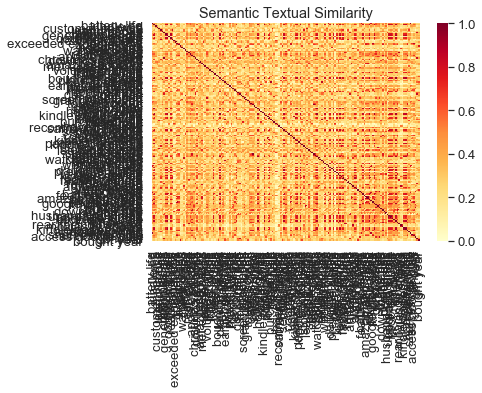

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

plot_similarity(np.array(key_words['term'].tolist()),np.array(key_words['embedding'].tolist()),90)

In [ ]:
print(reviews['text'][1193])
print(reviews['text'][1648])

In [ ]:
corr_maxes = np.amax(corr,axis=1)
corr_mins = np.amin(corr,axis=1)
avg_corr = sum(sum(corr))/n_sentence/n_sentence
avg_max_corr = sum(corr_maxes) / n_sentence
avg_min_corr = sum(corr_mins) / n_sentence
print('avg max corr:{}, avg min corr:{}. avg corr:{}'.format(avg_max_corr, avg_min_corr, avg_corr))

In [ ]:
corr_min_of_max = np.amin(corr_maxes)
corr_min_of_max

In [ ]:
np.amax(corr)

In [ ]:
labels = np.zeros(shape=n_sentence, dtype=np.int8)
chain = np.zeros(shape=n_sentence, dtype=np.int8)

the_line = 0.85#0.9*avg_max_corr+0.1*avg_corr
the_line

In [ ]:
np.where(corr > the_line)[0].shape[0]/(n_sentence*n_sentence)

In [ ]:
pairs = np.where(corr > 0.85)

In [ ]:
my_i=4
print(reviews['text'][pairs[0][my_i]])
print(reviews['text'][pairs[1][my_i]])

In [ ]:
def find_close_pt_with_label(s): # s: the index of the sentence
    for i in range(0, n_sentence):
        if corr[s][i]>the_line and labels[i]!=0:
            return i,labels[i]
    return 0, 0

def group_labels(labels):
    clusters = []
    for i in range(-1,np.amax(labels)):
        index = np.where(labels == i)
        clusters.append(index[0])
    return clusters

In [ ]:
label_count = 1
current_label=0

for i in range(0,n_sentence):
    if np.amax(corr[i])<0.85:
        labels[i] = -1 
        continue
    #######check if we should skip to next ####################
    if labels[i]!= 0: # if i already has a label
        continue
    ######or need to find the current sentence a label########
    else:
        (index_, temp) = find_close_pt_with_label(i) # try to find i an existing label
        if temp!=0:
            labels[i] = temp
            chain[i] = 1+chain[index_]
            if chain[i]>1: #1: # does not allow 2+ chain
                labels[i] = label_count
                label_count = label_count+1
        else:
            labels[i] = label_count # else, assign a new label
            label_count = label_count+1
    ###### finished assigning the current sentence a label#########
    
    current_label = labels[i]
    ###### move on to spread the label  ###########################
    for j in range(i, n_sentence):
        if labels[j]!=0: # if j already has a label
            continue # skip
        if corr[i][j]>the_line: # if sentence i is similar to sentence j enough
            if labels[j]==0: # if sentence j doesn't have a label
                labels[j] = current_label
                

In [ ]:
clusters = group_labels(labels)

In [ ]:
len(clusters)

In [ ]:
clusters

In [ ]:
clusters[1].shape[0]

In [ ]:
loose = []
remove_group = []
for i in range(0,len(clusters)):
    if clusters[i].shape[0]<10:
        for j in range(0,clusters[i].shape[0]):
            loose.append(clusters[i][j])
        remove_group.append(i)
        
loose = np.array(loose)

In [ ]:
clusters = np.array(clusters)
clusters = np.delete(clusters, remove_group, 0)
clusters = clusters.tolist()
clusters.append(loose)

In [ ]:
clusters

In [ ]:
##############save##############
product_title='Fire HD'
params='greedy-cosine'
dir1 = save_results_dir(product_title,'similarity',params+'/sentence')
make_or_clean_dir(dir1)
for i in range(0,len(clusters)):    
    temp = reviews.loc[clusters[i].tolist(),['text']]
    file_name = str(i)+'.txt'
    np.savetxt(r''+dir1+file_name, temp.values, fmt='%s')

#################################

In [ ]:
pca = dc.PCA(n_components=10)
pca.fit(X1)
X1 = pca.transform(X1)

pca = dc.PCA(n_components=10)
pca.fit(X2)
X2 = pca.transform(X2)

n_sentence = len(X2.tolist())
import math
n_min_pts = math.ceil(n_sentence*0.01)

print('number of sentences:{}, min points:{}'.format(n_sentence,n_min_pts))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

plot_similarity(np.array(reviews['text'].tolist())[0:50],np.array(reviews['sentence_embedding'].tolist())[0:50],90)

In [ ]:
label_s = np.array([])
label_w = np.array([])


def cluster_number(labels):
    return (len(set(labels)) - (1 if -1 in labels else 0))



In [ ]:
print('total sentences:',len(list(labels_s)))
print('clusters for sentences:',n_sentence, 'noise:',list(labels_s).count(-1))
print('clusters for words:',n_words, 'noise:',list(labels_w).count(-1))

In [ ]:
def save_results_dir(product_name, method, params):
    dir_pre = '/home/betty35/桌面/Capstone/workspace/data_testing/output/'
    dir_ = dir_pre+product_name+'/'+method+'/'+params+'/'
    return dir_


def make_dir(dir_):
    if not os.path.exists(dir_):
        try:
            os.makedirs(dir_)
        except FileExistsError:
            pass

def clean_dir(dir_):
    for file_ in os.listdir(dir_):
        file_dir = os.path.join(dir_, file_)
        try:
            if os.path.isfile(file_dir):
                os.unlink(file_dir)
            elif os.path.isdir(file_dir): shutil.rmtree(file_dir)
        except Exception as e:
            print(e)

def make_or_clean_dir(dir_):
    make_dir(dir_)
    clean_dir(dir_)
    

In [ ]:
product_title='Fire HD'
params='0.27-PCA10'
dir1 = save_results_dir(product_title,'dbscan',params+'/sentence')
make_or_clean_dir(dir1)
for i in range(0,n_sentence):    
    temp = reviews.loc[reviews['label_db_sentence']==i,['text']]
    file_name = str(i)+'.txt'
    np.savetxt(r''+dir1+file_name, temp.values, fmt='%s')

noise_s = temp = reviews.loc[reviews['label_db_sentence']==-1,['text']] 
np.savetxt(r''+dir1+'noise.txt', temp.values, fmt='%s')

dir1 = save_results_dir(product_title,'dbscan',params+'/word')
make_or_clean_dir(dir1)
for i in range(0,n_words):
    temp = reviews.loc[reviews['label_db_word']==i,['text']]
    file_name = str(i)+'.txt'
    np.savetxt(r''+dir1+file_name, temp.values, fmt='%s')
noise_s = temp = reviews.loc[reviews['label_db_word']==-1,['text']] 
np.savetxt(r''+dir1+'noise.txt', temp.values, fmt='%s')

In [ ]:
def cal_distance(X250):
    